In [3]:
import pandas as pd
import flags
import numpy as np
from matplotlib import pyplot
import os
from astropy.io import fits
import astropy.io.fits as fits
import astropy
from astropy.table import Table, join, hstack, vstack
from cycler import cycler
import healpy as hp
import pandas as pd
from random import choice

ModuleNotFoundError: No module named 'healpy'

In [25]:
#tab = gama
def convertepixel():
    path_dir = "/home/priscila/devel/mestrado/ps1/64"
    #path_dir = os.path.join(path_dir,dir)
    #path_dir = os.path.join(path_dir,'32768')
    for i,filename in enumerate(os.listdir(path_dir)):
        if i==0:
            pathfile = os.path.join(path_dir,filename)
            tab = Table.read(pathfile)
        else:
            pathfile = os.path.join(path_dir,filename)
            subtab = Table.read(pathfile)
            tab = vstack([tab, subtab])
    tab = tab.to_pandas()

    tab = tab.iloc[tab[iPSFMag !=  -999]]
    return tab
#pixel = convertepixel()
#pixel['graErr']*3600
#pyplot.hist(pixel['graErr']*3600,bins = 30)
#pyplot.hist(pixel['gdecErr']*3600,bins = 30)


In [26]:
#ps1 = Table.read("/home/priscila/arquivosfits/64/PixelFit_64_24292.fits")
match = Table.read("/home/priscila/devel/mestrado/resultados_pixel/mean/match_match_PixelFit_64_25859.fits").to_pandas()
match = match.loc[match['iKronMag'] != -999]

params_flags = {"use":True, "table":1, "band":'i'}
constraints = {"use":True, "type":"galaxy", "band": "i"}
constraints_star = {"use":True, "type":"star", "band": "i"}

def query_constraints(table,constraints):
    band_KronMag = table[''.join([constraints["band"],'KronMag'])]
    band_PSFMag  = table[''.join([constraints["band"],'PSFMag'])]

    if constraints['use']:
        if constraints["type"]=="galaxy":
            constraint = (band_KronMag - band_PSFMag) + 0.192 - 0.120*(band_KronMag - 21.) - 0.018*(band_KronMag - 21.)*(band_KronMag - 21.)
            list1 = np.where((table['gdec']>-999)*(table['gra']>-999)*(band_KronMag>-999)*(band_PSFMag>-999)*(constraint>0))  
        
        elif constraints["type"]=="star":
            constraint = (band_KronMag - band_PSFMag) + 0.192 - 0.120*(band_KronMag - 21.) - 0.018*(band_KronMag - 21.)*(band_KronMag - 21.)
            list1 = np.where((table['gdec']>-999)*(table['gra']>-999)*(band_KronMag>-999)*(band_PSFMag>-999)*(constraint<0))
        
        else:    
            list1 = np.where((table['gdec']>-999)*(table['gra']>-999)*(band_KronMag>-999)*(band_PSFMag>-999))
    else:
        list1 = np.where((table['gdec']>-999)*(table['gra']>-999))
    
    return table[list1]
#ps1gal = query_constraints(ps1, constraints)
#ps1star = query_constraints(ps1, constraints_star)


## Para selecionar valores de uma coluna em um determinado range, podemos usar o método query do pandas:

In [27]:
match.columns

Index(['SPECID', 'SURVEY', 'SURVEY_CODE', 'RA_1', 'DEC_1', 'WMIN', 'WMAX', 'Z',
       'NQ', 'PROB',
       ...
       'yPSFMagErr', 'yApMag', 'yApMagErr', 'yKronMag', 'yKronMagErr',
       'raMean', 'decMean', 'raStack', 'decStack', 'random'],
      dtype='object', length=146)

In [28]:
minor = match[match['PETROMAG_I'] < 19.0]

In [29]:
major = match[match['PETROMAG_I'] > 19.0]

In [30]:
#fig = pyplot.figure()
#grid = pyplot.GridSpec(1,1,top=2,right=2)
#ax = pyplot.subplot(grid[0,0])
#pyplot.scatter(pixel['iPSFMag'],pixel['iPSFMag'] - pixel['iKronMag'],s = 200, label ='PAN STARRS pixel')
#pyplot.scatter(major['iPSFMag'],major['iPSFMag'] - major['iKronMag'] ,s= 190,color='pink', label=' Mag > 19')
#pyplot.scatter(minor['iPSFMag'],minor['iPSFMag'] - minor['iKronMag'] ,s= 15,color='purple', label=' Mag < 19')
#pyplot.scatter(ps1gal['iPSFMag'],ps1gal['iPSFMag'] - ps1gal['iKronMag'] ,s= 5,color='red', label='Stars')
#pyplot.scatter(ps1star['iPSFMag'],ps1star['iPSFMag'] - ps1star['iKronMag'] ,s= 5,color='cyan', label='Galaxies')
#pyplot.scatter(tab_new['iPSFMag'],tab_new['iPSFMag'] - tab_new['iKronMag'] ,s= 150,color='yellow', label=' ')
#ax.axhline(y=0, color='black',ls='--')
#ax.axvline(x=21, color='black',ls='--')
#pyplot.legend(loc='best')
#pyplot.xlim(15,21)
#pyplot.ylim(-1,3)

In [31]:
match['random']

0      0.181632
1      0.978981
2      0.702411
3      0.091898
4      0.076862
         ...   
173    0.622248
174    0.122685
175    0.387801
176    0.819989
177    0.830655
Name: random, Length: 177, dtype: float64

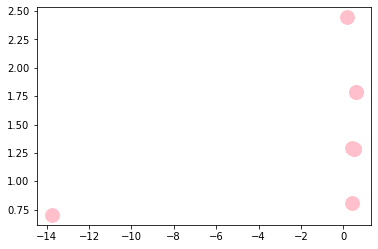

In [32]:
pyplot.scatter(major['PETROMAG_R'] - major['MODELMAG_I'],major['rPSFMag'] - major['iKronMag'] ,s= 190,color='pink', label=' Mag > 19')


In [1]:
def gluetable(path_dir, final_dest):
    tables = []
    for i,filename in enumerate(os.listdir(path_dir)):
        tables.append(Table.read(os.path.join(path_dir,filename)))
    table = vstack(tables)
    table.write(final_dest, overwrite = True)
    return table


In [78]:
tab = gluetable('/home/priscila/devel/mestrado/resultados_pixel/mean','/home/priscila/devel/mestrado/results_mean.fits' )

### Regiões do gama

In [35]:
reg_ra = ((30.2,38.8),(129.0,141.0),(174.0,186.0),(211.5,223.5),(339.0, 351.0))

In [79]:
match = Table.read('/home/priscila/devel/mestrado/resultados_pixel/ps1_2.fits')
reg_dec = ((-10.25,-3.72),(-2,3),(-3,2),(-2,3),(-35,-30))
#for col in match.columns:
#    print(col)
#match = match[match['iPSFMag'] != -999]
#match = match[match['rPSFMag'] != -999]
#match = match[match['iKronMag'] != -999]

OBJID,RA,DEC,flags,flags_r,type,rowc,colc,fiberMag_r,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,psfMagErr_u,psfMagErr_g,psfMagErr_r,psfMagErr_i,psfMagErr_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,petroMagErr_u,petroMagErr_g,petroMagErr_r,petroMagErr_i,petroMagErr_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,modelMagErr_u,modelMagErr_g,modelMagErr_r,modelMagErr_i,modelMagErr_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,objID,uniquePspsSTid,ippObjID,surveyID,tessID,projectionID,skyCellID,randomStackObjID,primaryDetection,bestDetection,dvoRegionID,processingVersion,gippDetectID,gstackDetectID,gstackImageId,gra,gdec,graErr,gdecErr,gEpoch,gPSFMag,gPSFMagErr,gApMag,gApMagErr,gKronMag,gKronMagErr,ginfoFlag,ginfoFlag2,ginfoFlag3,gnFrames,rippDetectID,rstackDetectID,rstackImageId,rra,rdec,rraErr,rdecErr,rEpoch,rPSFMag,rPSFMagErr,rApMag,rApMagErr,rKronMag,rKronMagErr,rinfoFlag,rinfoFlag2,rinfoFlag3,rnFrames,iippDetectID,istackDetectID,istackImageId,ira,idec,iraErr,idecErr,iEpoch,iPSFMag,iPSFMagErr,iApMag,iApMagErr,iKronMag,iKronMagErr,iinfoFlag,iinfoFlag2,iinfoFlag3,inFrames,zippDetectID,zstackDetectID,zstackImageId,zra,zdec,zraErr,zdecErr,zEpoch,zPSFMag,zPSFMagErr,zApMag,zApMagErr,zKronMag,zKronMagErr,yippDetectID,ystackDetectID,ystackImageId,yra,ydec,yraErr,ydecErr,yEpoch,yPSFMag,yPSFMagErr,yApMag,yApMagErr,yKronMag,yKronMagErr,raMean,decMean,raStack,decStack,random
,deg,deg,,,,pix,pix,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,int64,int64,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1237652900227383394,37.43342325665175,-8.732184663853591,35253360136720,4503874773745680,6,1310.866,1474.7395,19.984074,20.594967,19.817478,19.664684,19.396603,19.331802,0.06000902,0.022631926,0.020015491,0.02244033,0.06418511,20.705284,19.858624,19.677134,19.434101,19.55154,0.10616525,0.02191558,0.02906347,0.03619928,0.1733501,20.58584,19.807241,19.629995,19.353992,19.292288,0.064344585,0.01544648,0.017163744,0.019244228,0.06755058,0.17798786,0.13096178,0.0949844,0.072023794,0.05106577,97520374333931688,3677940000004031,404396940741645,0,2,1063,82,0.377849026935034,1,1,94156,3,3455,2523134218796535167,4166467,37.43340732,-8.73222172,0.005249,0.00505226,56079.8504429,19.5264,0.007813,19.5174,0.003059,19.6003,0.010986,262144069,524416,196608,11,3455,2523094382974864767,4018067,37.43340074,-8.73223765,0.0052669,0.00536211,56231.8224921,19.3492,0.007857,19.3217,0.002483,19.3896,0.010837,262144069,524416,196608,10,3455,2523101669118446975,4045210,37.4333991,-8.73223506,0.00318957,0.00297276,56263.2766069,19.1636,0.006164,19.0892,0.002082,19.1801,0.009605,262144069,524416,196608,14,3455,2523092292399533439,4010279,37.43339766,-8.73223755,0.00503833,0.00505492,55797.0900734,19.1071,0.009969,19.034,0.002323,19.1063,0.015963,3455,252

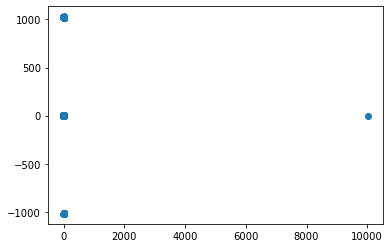

In [86]:
colors = ('b','g','r','c','m','y','k','w')
region = match[match['RA'] > 30.2]
region = region[region['RA'] < 38.8]
region = region[region['DEC']>-10.25]
region = region[region['DEC']<-3.72]
pyplot.scatter(region['petroMag_r'] - region['modelMag_i'], region['rPSFMag'] - region['iKronMag'])
region

In [90]:
match =  Table.read('/home/priscila/devel/mestrado/resultados_pixel/ps1_1.fits')

In [92]:
region = match[match['RA_1'] > 129.0]
region = region[region['RA_1'] < 141.0]
region = region[region['DEC_1']>-2]
region = region[region['DEC_1']<3]
#pyplot.scatter(region['PETROMAG_R'] - region['MODELMAG_I'], region['rPSFMag'] - region['iKronMag'])
region

SPECID,SURVEY,SURVEY_CODE,RA_1,DEC_1,WMIN,WMAX,Z,NQ,PROB,FILENAME,URL,URL_IMG,CATAID_1,GAMA_NAME,IC_FLAG,DIST,IS_SBEST,IS_BEST,CATAID_2,OBJID,RA_2,DEC_2,FLAGS,PRIMTARGET,TYPE,PSFMAG_R,FIBERMAG_R,FLAGS_R,EXTINCTION_R,PETRORAD_R,PETROR90_R,PETROR50_R,PETROMAG_G,PETROMAG_R,PETROMAG_I,MODELMAG_U,MODELMAG_G,MODELMAG_R,MODELMAG_I,MODELMAG_Z,STATUS,RUN,MASK_IC_10,MASK_IC_12,MASK_SATUR,EXCEPTION_FLAG,objID,uniquePspsSTid,ippObjID,surveyID,tessID,projectionID,skyCellID,randomStackObjID,primaryDetection,bestDetection,dvoRegionID,processingVersion,gippDetectID,gstackDetectID,gstackImageId,gra,gdec,graErr,gdecErr,gEpoch,gPSFMag,gPSFMagErr,gApMag,gApMagErr,gKronMag,gKronMagErr,ginfoFlag,ginfoFlag2,ginfoFlag3,gnFrames,rippDetectID,rstackDetectID,rstackImageId,rra,rdec,rraErr,rdecErr,rEpoch,rPSFMag,rPSFMagErr,rApMag,rApMagErr,rKronMag,rKronMagErr,rinfoFlag,rinfoFlag2,rinfoFlag3,rnFrames,iippDetectID,istackDetectID,istackImageId,ira,idec,iraErr,idecErr,iEpoch,iPSFMag,iPSFMagErr,iApMag,iApMagErr,iKronMag,iKronMagErr,iinfoFlag,iinfoFlag2,iinfoFlag3,inFrames,zippDetectID,zstackDetectID,zstackImageId,zra,zdec,zraErr,zdecErr,zEpoch,zPSFMag,zPSFMagErr,zApMag,zApMagErr,zKronMag,zKronMagErr,yippDetectID,ystackDetectID,ystackImageId,yra,ydec,yraErr,ydecErr,yEpoch,yPSFMag,yPSFMagErr,yApMag,yApMagErr,yKronMag,yKronMagErr,raMean,decMean,raStack,decStack,random
,,,,,,,,,,,,,,,,,,,,,deg,deg,,,,mag,mag,,mag,arcsec,arcsec,arcsec,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes33,bytes9,int16,float64,float64,float32,float64,float32,int16,float32,bytes67,bytes88,bytes92,int32,bytes23,int16,float32,int16,int16,int32,int64,float64,float64,int64,int32,int16,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int16,float32,float32,int16,int16,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2SLJ091656.03-001131.5_1,2SLAQ-LRG,4,139.23344,-0.19207,5030.82,7281.75,0.4896,3,0.0,/GAMA/dr3/data/spectra/2slaq-lrg/J091656.03-001131.5_1.fit,http://www.gama-survey.org/dr3/data/spectra/2slaq-lrg/J091656.03-001131.5_1.fit,http://www.gama-survey.org/dr3/data/spectra/2slaq-lrg/png/J091656.03-001131.5_1.png,915968,GAMAJ091656.02-001131.4,520,0.03,1,1,915968,588848899894805110,139.23344597,-0.19206494,217164415232,0,3,20.980818,21.12659,4503874773876736,0.08566834,3.5077493,3.6640463,1.6170532,21.636408,20.176817,19.177769,23.069876,21.663748,20.057287,19.22023,18.71689,9843,756,0.0,0.0,0,0,107771392334380030,3649671000000197,377261337347945,0,2,1267,96,0.406149332789843,1,1,87838,3,8236,2523226617770156076,4510680,139.23350912,-0.19214315,0.0486662,0.0460781,55940.8936979,22.9052,0.102389,22.2312,0.009157,22.2193,0.101358,262160391,655360,196608,10,8236,2523226798964088876,4511355,139.23345081,-0.19204134,0.0205635,0.0195398,56231.9417035,20.8443,0.038948,20.2319,0.00398,20.1406,0.041926,262160391,655488,196608,7,8236,2523238099559915564,4553453,139.23345231,-0.19206508,0.00733542,0.00692488,56590.1175816,20.1814,0.013637,19.6039,0.001994,19.4538,0.016408,262160391,524416,196608,19,8236,2523222512586727468,4495387,139.23349096,-0.19209428,0.0104958,0.00989879,56107.2254191,19.9423,0.025811,19.2406,0.003119,18.8957,0.027271,8236,2523217922340429868,4478287,139.23

In [98]:
match = Table.read('/home/priscila/devel/mestrado/resultados_pixel/ps1_1.fits')
region = match[match['RA_1'] > 174.0]
region = region[region['RA_1'] < 186]
region = region[region['DEC_1']>-3]
region = region[region['DEC_1']<2]

#pyplot.scatter(region['PETROMAG_R'] - region['MODELMAG_I'], region['rPSFMag'] - region['iKronMag'])
region

SPECID,SURVEY,SURVEY_CODE,RA_1,DEC_1,WMIN,WMAX,Z,NQ,PROB,FILENAME,URL,URL_IMG,CATAID_1,GAMA_NAME,IC_FLAG,DIST,IS_SBEST,IS_BEST,CATAID_2,OBJID,RA_2,DEC_2,FLAGS,PRIMTARGET,TYPE,PSFMAG_R,FIBERMAG_R,FLAGS_R,EXTINCTION_R,PETRORAD_R,PETROR90_R,PETROR50_R,PETROMAG_G,PETROMAG_R,PETROMAG_I,MODELMAG_U,MODELMAG_G,MODELMAG_R,MODELMAG_I,MODELMAG_Z,STATUS,RUN,MASK_IC_10,MASK_IC_12,MASK_SATUR,EXCEPTION_FLAG,objID,uniquePspsSTid,ippObjID,surveyID,tessID,projectionID,skyCellID,randomStackObjID,primaryDetection,bestDetection,dvoRegionID,processingVersion,gippDetectID,gstackDetectID,gstackImageId,gra,gdec,graErr,gdecErr,gEpoch,gPSFMag,gPSFMagErr,gApMag,gApMagErr,gKronMag,gKronMagErr,ginfoFlag,ginfoFlag2,ginfoFlag3,gnFrames,rippDetectID,rstackDetectID,rstackImageId,rra,rdec,rraErr,rdecErr,rEpoch,rPSFMag,rPSFMagErr,rApMag,rApMagErr,rKronMag,rKronMagErr,rinfoFlag,rinfoFlag2,rinfoFlag3,rnFrames,iippDetectID,istackDetectID,istackImageId,ira,idec,iraErr,idecErr,iEpoch,iPSFMag,iPSFMagErr,iApMag,iApMagErr,iKronMag,iKronMagErr,iinfoFlag,iinfoFlag2,iinfoFlag3,inFrames,zippDetectID,zstackDetectID,zstackImageId,zra,zdec,zraErr,zdecErr,zEpoch,zPSFMag,zPSFMagErr,zApMag,zApMagErr,zKronMag,zKronMagErr,yippDetectID,ystackDetectID,ystackImageId,yra,ydec,yraErr,ydecErr,yEpoch,yPSFMag,yPSFMagErr,yApMag,yApMagErr,yKronMag,yKronMagErr,raMean,decMean,raStack,decStack,random
,,,,,,,,,,,,,,,,,,,,,deg,deg,,,,mag,mag,,mag,arcsec,arcsec,arcsec,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes33,bytes9,int16,float64,float64,float32,float64,float32,int16,float32,bytes67,bytes88,bytes92,int32,bytes23,int16,float32,int16,int16,int32,int64,float64,float64,int64,int32,int16,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int16,float32,float32,int16,int16,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2dF291543,2dFGRS,2,176.96523,1.208,3693.46,8103.65,0.0945,4,0.0,/GAMA/dr3/data/spectra/2dfgrs/291543.fit,http://www.gama-survey.org/dr3/data/spectra/2dfgrs/291543.fit,http://www.gama-survey.org/dr3/data/spectra/2dfgrs/png/291543.png,22279,GAMAJ114751.70+011229.1,4104,0.87,1,0,22279,588848901521932458,176.96545683,1.20808539,68988043312,64,3,18.36912,18.471325,6755674587430928,0.072446704,3.5490618,5.0870132,1.563818,18.433565,17.529692,17.125381,20.404572,18.462486,17.529696,17.117874,16.7666,26227,756,0.0,0.0,0,0,109451769654550202,3705545000001919,61538291430585,0,2,1366,32,0.451101203869191,1,1,14328,3,5272,2523198247632114840,4404993,176.96544996,1.20811793,0.00393994,0.00378785,55879.1889154,19.222,0.006869,18.7007,0.002142,18.3566,0.008419,262160391,524416,196608,8,5272,2523200362366637208,4412871,176.96545176,1.20812155,0.00241442,0.00230289,56303.0517454,18.4635,0.004315,17.8964,0.001271,17.5584,0.005288,262160391,524416,196608,10,5272,2523200603958547608,4413771,176.96545978,1.20812565,0.00120562,0.00108422,56677.1962891,18.1304,0.00247,17.5192,0.000765,17.0497,0.003625,262160391,524416,196608,20,5272,2523200668383057048,4414011,176.96544016,1.20811184,0.00183256,0.00175086,55980.9026816,17.7823,0.00405,17.2853,0.00098,16.898,0.005461,5272,2523198702898648216,4406689,176.96546509,1.20811452,0.00278406,0.00251304,55900.8555246,17.6396,0.006721,17.1034,0

In [99]:
region = match[match['RA_1'] > 339.0]
region = region[region['RA_1'] < 351]
region = region[region['DEC_1']>-35]
region = region[region['DEC_1']<30]

#pyplot.scatter(region['PETROMAG_R'] - region['MODELMAG_I'], region['rPSFMag'] - region['iKronMag'],s= 400)
region

SPECID,SURVEY,SURVEY_CODE,RA_1,DEC_1,WMIN,WMAX,Z,NQ,PROB,FILENAME,URL,URL_IMG,CATAID_1,GAMA_NAME,IC_FLAG,DIST,IS_SBEST,IS_BEST,CATAID_2,OBJID,RA_2,DEC_2,FLAGS,PRIMTARGET,TYPE,PSFMAG_R,FIBERMAG_R,FLAGS_R,EXTINCTION_R,PETRORAD_R,PETROR90_R,PETROR50_R,PETROMAG_G,PETROMAG_R,PETROMAG_I,MODELMAG_U,MODELMAG_G,MODELMAG_R,MODELMAG_I,MODELMAG_Z,STATUS,RUN,MASK_IC_10,MASK_IC_12,MASK_SATUR,EXCEPTION_FLAG,objID,uniquePspsSTid,ippObjID,surveyID,tessID,projectionID,skyCellID,randomStackObjID,primaryDetection,bestDetection,dvoRegionID,processingVersion,gippDetectID,gstackDetectID,gstackImageId,gra,gdec,graErr,gdecErr,gEpoch,gPSFMag,gPSFMagErr,gApMag,gApMagErr,gKronMag,gKronMagErr,ginfoFlag,ginfoFlag2,ginfoFlag3,gnFrames,rippDetectID,rstackDetectID,rstackImageId,rra,rdec,rraErr,rdecErr,rEpoch,rPSFMag,rPSFMagErr,rApMag,rApMagErr,rKronMag,rKronMagErr,rinfoFlag,rinfoFlag2,rinfoFlag3,rnFrames,iippDetectID,istackDetectID,istackImageId,ira,idec,iraErr,idecErr,iEpoch,iPSFMag,iPSFMagErr,iApMag,iApMagErr,iKronMag,iKronMagErr,iinfoFlag,iinfoFlag2,iinfoFlag3,inFrames,zippDetectID,zstackDetectID,zstackImageId,zra,zdec,zraErr,zdecErr,zEpoch,zPSFMag,zPSFMagErr,zApMag,zApMagErr,zKronMag,zKronMagErr,yippDetectID,ystackDetectID,ystackImageId,yra,ydec,yraErr,ydecErr,yEpoch,yPSFMag,yPSFMagErr,yApMag,yApMagErr,yKronMag,yKronMagErr,raMean,decMean,raStack,decStack,random
,,,,,,,,,,,,,,,,,,,,,deg,deg,,,,mag,mag,,mag,arcsec,arcsec,arcsec,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes33,bytes9,int16,float64,float64,float32,float64,float32,int16,float32,bytes67,bytes88,bytes92,int32,bytes23,int16,float32,int16,int16,int32,int64,float64,float64,int64,int32,int16,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int16,float32,float32,int16,int16,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


### Dados do DES

In [10]:
gluetable('/home/priscila/devel/mestrado/resultados_pixel/desgama','/home/priscila/devel/mestrado/resultados_pixel/result_gamades.fits')

OBJID,RA_1,DEC_1,flags,flags_r,type,rowc,colc,fiberMag_r,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,psfMagErr_u,psfMagErr_g,psfMagErr_r,psfMagErr_i,psfMagErr_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,petroMagErr_u,petroMagErr_g,petroMagErr_r,petroMagErr_i,petroMagErr_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,modelMagErr_u,modelMagErr_g,modelMagErr_r,modelMagErr_i,modelMagErr_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,COADD_OBJECT_ID,TILENAME,HPIX_32,HPIX_64,HPIX_1024,HPIX_4096,HPIX_16384,RA_2,DEC_2,ALPHAWIN_J2000,DELTAWIN_J2000,GALACTIC_L,GALACTIC_B,XWIN_IMAGE,YWIN_IMAGE,A_IMAGE,ERRA_IMAGE,B_IMAGE,ERRB_IMAGE,THETA_J2000,ERRTHETA_IMAGE,KRON_RADIUS,EBV_SFD98,MAG_AUTO_G_DERED,MAG_AUTO_R_DERED,MAG_AUTO_I_DERED,MAG_AUTO_Z_DERED,MAG_AUTO_Y_DERED,WAVG_MAG_PSF_G_DERED,WAVG_MAG_PSF_R_DERED,WAVG_MAG_PSF_I_DERED,WAVG_MAG_PSF_Z_DERED,WAVG_MAG_PSF_Y_DERED,FLAGS_G,IMAFLAGS_ISO_G,NEPOCHS_G,FLAGS_R,IMAFLAGS_ISO_R,NEPOCHS_R,FLAGS_I,IMAFLAGS_ISO_I,NEPOCHS_I,FLAGS_Z,IMAFLAGS_ISO_Z,NEPOCHS_Z,FLAGS_Y,IMAFLAGS_ISO_Y,NEPOCHS_Y,XWIN_IMAGE_G,XWIN_IMAGE_R,XWIN_IMAGE_I,XWIN_IMAGE_Z,XWIN_IMAGE_Y,YWIN_IMAGE_G,YWIN_IMAGE_R,YWIN_IMAGE_I,YWIN_IMAGE_Z,YWIN_IMAGE_Y,X2WIN_IMAGE_G,X2WIN_IMAGE_R,X2WIN_IMAGE_I,X2WIN_IMAGE_Z,X2WIN_IMAGE_Y,Y2WIN_IMAGE_G,Y2WIN_IMAGE_R,Y2WIN_IMAGE_I,Y2WIN_IMAGE_Z,Y2WIN_IMAGE_Y,XYWIN_IMAGE_G,XYWIN_IMAGE_R,XYWIN_IMAGE_I,XYWIN_IMAGE_Z,XYWIN_IMAGE_Y,ERRX2WIN_IMAGE_G,ERRX2WIN_IMAGE_R,ERRX2WIN_IMAGE_I,ERRX2WIN_IMAGE_Z,ERRX2WIN_IMAGE_Y,ERRY2WIN_IMAGE_G,ERRY2WIN_IMAGE_R,ERRY2WIN_IMAGE_I,ERRY2WIN_IMAGE_Z,ERRY2WIN_IMAGE_Y,ERRXYWIN_IMAGE_G,ERRXYWIN_IMAGE_R,ERRXYWIN_IMAGE_I,ERRXYWIN_IMAGE_Z,ERRXYWIN_IMAGE_Y,AWIN_IMAGE_G,AWIN_IMAGE_R,AWIN_IMAGE_I,AWIN_IMAGE_Z,AWIN_IMAGE_Y,BWIN_IMAGE_G,BWIN_IMAGE_R,BWIN_IMAGE_I,BWIN_IMAGE_Z,BWIN_IMAGE_Y,THETAWIN_IMAGE_G,THETAWIN_IMAGE_R,THETAWIN_IMAGE_I,THETAWIN_IMAGE_Z,THETAWIN_IMAGE_Y,ERRAWIN_IMAGE_G,ERRAWIN_IMAGE_R,ERRAWIN_IMAGE_I,ERRAWIN_IMAGE_Z,ERRAWIN_IMAGE_Y,ERRBWIN_IMAGE_G,ERRBWIN_IMAGE_R,ERRBWIN_IMAGE_I,ERRBWIN_IMAGE_Z,ERRBWIN_IMAGE_Y,ERRTHETAWIN_IMAGE_G,ERRTHETAWIN_IMAGE_R,ERRTHETAWIN_IMAGE_I,ERRTHETAWIN_IMAGE_Z,ERRTHETAWIN_IMAGE_Y,FLUX_RADIUS_G,FLUX_RADIUS_R,FLUX_RADIUS_I,FLUX_RADIUS_Z,FLUX_RADIUS_Y,FWHM_IMAGE_G,FWHM_IMAGE_R,FWHM_IMAGE_I,FWHM_IMAGE_Z,FWHM_IMAGE_Y,ISOAREA_IMAGE_G,ISOAREA_IMAGE_R,ISOAREA_IMAGE_I,ISOAREA_IMAGE_Z,ISOAREA_IMAGE_Y,BACKGROUND_G,BACKGROUND_R,BACKGROUND_I,BACKGROUND_Z,BACKGROUND_Y,NITER_MODEL_G,NITER_MODEL_R,NITER_MODEL_I,NITER_MODEL_Z,NITER_MODEL_Y,KRON_RADIUS_G,KRON_RADIUS_R,KRON_RADIUS_I,KRON_RADIUS_Z,KRON_RADIUS_Y,MAG_AUTO_G,MAG_AUTO_R,MAG_AUTO_I,MAG_AUTO_Z,MAG_AUTO_Y,MAGERR_AUTO_G,MAGERR_AUTO_R,MAGERR_AUTO_I,MAGERR_AUTO_Z,MAGERR_AUTO_Y,WAVG_MAG_PSF_G,WAVG_MAG_PSF_R,WAVG_MAG_PSF_I,WAVG_MAG_PSF_Z,WAVG_MAG_PSF_Y,WAVG_MAGERR_PSF_G,WAVG_MAGERR_PSF_R,WAVG_MAGERR_PSF_I,WAVG_MAGERR_PSF_Z,WAVG_MAGERR_PSF_Y,FLUX_AUTO_G,FLUX_AUTO_R,FLUX_AUTO_I,FLUX_AUTO_Z,FLUX_AUTO_Y,FLUXERR_AUTO_G,FLUXERR_AUTO_R,FLUXERR_AUTO_I,FLUXERR_AUTO_Z,FLUXERR_AUTO_Y,WAVG_FLUX_PSF_G,WAVG_FLUX_PSF_R,WAVG_FLUX_PSF_I,WAVG_FLUX_PSF_Z,WAVG_FLUX_PSF_Y,WAVG_FLUXERR_PSF_G,WAVG_FLUXERR_PSF_R,WAVG_FLUXERR_PSF_I,WAVG_FLUXERR_PSF_Z,WAVG_FLUXERR_PSF_Y,CLASS_STAR_G,CLASS_STAR_R,CLASS_STAR_I,CLASS_STAR_Z,CLASS_STAR_Y,SPREAD_MODEL_G,SPREAD_MODEL_R,SPREAD_MODEL_I,SPREAD_MODEL_Z,SPREAD_MODEL_Y,WAVG_SPREAD_MODEL_G,WAVG_SPREAD_MODEL_R,WAVG_SPREAD_MODEL_I,WAVG_SPREAD_MODEL_Z,WAVG_SPREAD_MODEL_Y,SPREADERR_MODEL_G,SPREADERR_MODEL_R,SPREADERR_MODEL_I,SPREADERR_MODEL_Z,SPREADERR_MODEL_Y,WAVG_SPREADERR_MODEL_G,WAVG_SPREADERR_MODEL_R,WAVG_SPREADERR_MODEL_I,WAVG_SPREADERR_MODEL_Z,WAVG_SPREADERR_MODEL_Y,random
,deg,deg,,,,pix,pix,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int6

## Dados PS1 x Filipe

In [1]:
#ps1_zfilipe = Table.read(gluetable('/home/priscila/devel/mestrado/resultados_pixel/zfilipeps1','/home/priscila/devel/mestrado/resultados_pixel/zfilipeps1.fits'))

In [ ]:
e